In [1]:
import math
import numpy as np
import pandas as pd

In [2]:
idf = pd.read_csv('cardio_train.csv')

In [96]:
idf

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0
...,...
69995,99993;19240;2;168;76.0;120;80;1;1;1;0;1;0
69996,99995;22601;1;158;126.0;140;90;2;2;0;0;1;1
69997,99996;19066;2;183;105.0;180;90;3;1;0;1;0;1
69998,99998;22431;1;163;72.0;135;80;1;2;0;0;0;1


In [4]:
#fix the data
columns = "id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio;bias".split(';')
df = pd.DataFrame(index=range(70000), columns=columns, dtype=np.float64)

In [5]:
for i in range(70000):
    r = idf.iloc[i][0].split(';')
    for j in range(len(r)):
        df.iloc[i][columns[j]] = float(r[j])

In [6]:
df = df.drop(['id'], axis=1)

In [7]:
df.bias = 1.0

In [8]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bias
0,18393.0,2.0,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,20228.0,1.0,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0,1.0
2,18857.0,1.0,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0
3,17623.0,2.0,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
4,17474.0,1.0,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240.0,2.0,168.0,76.0,120.0,80.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
69996,22601.0,1.0,158.0,126.0,140.0,90.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0
69997,19066.0,2.0,183.0,105.0,180.0,90.0,3.0,1.0,0.0,1.0,0.0,1.0,1.0
69998,22431.0,1.0,163.0,72.0,135.0,80.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0


In [9]:
#one hot encoding
df2 = pd.get_dummies(df, columns=['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'])

In [10]:
df2

,age,height,weight,ap_hi,ap_lo,bias,gender_1.0,gender_2.0,cholesterol_1.0,cholesterol_2.0,...,gluc_2.0,gluc_3.0,smoke_0.0,smoke_1.0,alco_0.0,alco_1.0,active_0.0,active_1.0,cardio_0.0,cardio_1.0
0,18393.0,168.0,62.0,110.0,80.0,1.0,0,1,1,0,...,0,0,1,0,1,0,0,1,1,0
1,20228.0,156.0,85.0,140.0,90.0,1.0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,18857.0,165.0,64.0,130.0,70.0,1.0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,1
3,17623.0,169.0,82.0,150.0,100.0,1.0,0,1,1,0,...,0,0,1,0,1,0,0,1,0,1
4,17474.0,156.0,56.0,100.0,60.0,1.0,1,0,1,0,...,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240.0,168.0,76.0,120.0,80.0,1.0,0,1,1,0,...,0,0,0,1,1,0,0,1,1,0
69996,22601.0,158.0,126.0,140.0,90.0,1.0,1,0,0,1,...,1,0,1,0,1,0,0,1,0,1
69997,19066.0,183.0,105.0,180.0,90.0,1.0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,1
69998,22431.0,163.0,72.0,135.0,80.0,1.0,1,0,1,0,...,1,0,1,0,1,0,1,0,0,1


In [11]:
#convert to numpy for easier processing
features = np.array(df2.drop(['cardio_1.0', 'cardio_0.0'], axis=1))
labels = np.array(df2.iloc[:, -2:])

In [12]:
features.shape

(70000, 20)

In [13]:
labels.shape

(70000, 2)

In [14]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

2023-10-01 17:01:02.742286: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [15]:
#separate test and training data
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=.1)

In [16]:
#use a neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(features.shape[1],)),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2, activation='sigmoid')
    
])


2023-10-01 17:01:08.853653: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [17]:
loss_fn = tf.keras.losses.CategoricalCrossentropy()


In [18]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


In [19]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1969/1969 [==============================] - 8s 4ms/step - loss: 22.9001 - accuracy: 0.5181
Epoch 2/10
1969/1969 [==============================] - 7s 3ms/step - loss: 15.2459 - accuracy: 0.5493
Epoch 3/10
1969/1969 [==============================] - 7s 3ms/step - loss: 9.1351 - accuracy: 0.5794
Epoch 4/10
1969/1969 [==============================] - 8s 4ms/step - loss: 9.9773 - accuracy: 0.5820
Epoch 5/10
1969/1969 [==============================] - 7s 4ms/step - loss: 8.7766 - accuracy: 0.5960
Epoch 6/10
1969/1969 [==============================] - 8s 4ms/step - loss: 9.4292 - accuracy: 0.5945
Epoch 7/10
1969/1969 [==============================] - 8s 4ms/step - loss: 10.0867 - accuracy: 0.5890
Epoch 8/10
1969/1969 [==============================] - 9s 4ms/step - loss: 8.2322 - accuracy: 0.6008
Epoch 9/10
1969/1969 [==============================] - 9s 4ms/step - loss: 9.2601 - accuracy: 0.5960
Epoch 10/10
1969/1969 [==============================] - 9s 5ms/step - loss: 8.

In [20]:
model.evaluate(x_test,  y_test, verbose=2)


219/219 - 1s - loss: 11.3488 - accuracy: 0.5079 - 639ms/epoch - 3ms/step


[11.348836898803711, 0.5078571438789368]

In [61]:
#simpler model
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, activation='softmax', input_shape=(features.shape[1],))
])

In [62]:
model2.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


In [63]:
model2.fit(x_train, y_train, epochs=10)

Epoch 1/10
1969/1969 [==============================] - 7s 3ms/step - loss: 167.0472 - accuracy: 0.4673
Epoch 2/10
1969/1969 [==============================] - 6s 3ms/step - loss: 1.4581 - accuracy: 0.5419
Epoch 3/10
1969/1969 [==============================] - 6s 3ms/step - loss: 1.1603 - accuracy: 0.6008
Epoch 4/10
1969/1969 [==============================] - 5s 3ms/step - loss: 1.1391 - accuracy: 0.6111
Epoch 5/10
1969/1969 [==============================] - 5s 3ms/step - loss: 1.2484 - accuracy: 0.6055
Epoch 6/10
1969/1969 [==============================] - 5s 3ms/step - loss: 1.1612 - accuracy: 0.6099
Epoch 7/10
1969/1969 [==============================] - 6s 3ms/step - loss: 1.0917 - accuracy: 0.6115
Epoch 8/10
1969/1969 [==============================] - 6s 3ms/step - loss: 1.2677 - accuracy: 0.5986
Epoch 9/10
1969/1969 [==============================] - 6s 3ms/step - loss: 1.1735 - accuracy: 0.6153
Epoch 10/10
1969/1969 [==============================] - 6s 3ms/step - loss: 1.2

In [64]:
model2.evaluate(x_test,  y_test, verbose=2)


219/219 - 1s - loss: 2.0200 - accuracy: 0.4986 - 573ms/epoch - 3ms/step


[2.020017623901367, 0.4985714256763458]

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
#use a decision tree
tree = DecisionTreeClassifier().fit(x_train, y_train)

In [27]:
tree.score(x_test, y_test)

0.6407142857142857

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
#try a linear model
lin = LinearRegression().fit(x_train, y_train)

In [30]:
lin.score(x_train, y_train)

0.1203711098272705

In [31]:
lin.score(x_test, y_test)

0.12339698211509709

In [32]:
preds = lin.predict(x_test)

In [33]:
preds

array([[ 0.61217011,  0.38782989],
       [ 0.34868786,  0.65131214],
       [-0.05129637,  1.05129637],
       ...,
       [ 0.62103469,  0.37896531],
       [ 0.19272914,  0.80727086],
       [ 0.36509234,  0.63490766]])

In [34]:
lin.coef_

array([[-4.05308569e-05,  2.19972754e-03, -5.23615997e-03,
        -1.22336250e-04, -1.34694301e-04,  2.77555756e-17,
         9.42057805e-03, -9.42057805e-03,  1.31995594e-01,
         8.31166678e-03, -1.40307260e-01, -1.82138761e-02,
        -3.65625884e-02,  5.47764645e-02, -1.13268657e-02,
         1.13268657e-02, -1.40970901e-02,  1.40970901e-02,
        -1.98835660e-02,  1.98835660e-02],
       [ 4.05308569e-05, -2.19972754e-03,  5.23615997e-03,
         1.22336250e-04,  1.34694301e-04, -2.77555756e-17,
        -9.42057805e-03,  9.42057805e-03, -1.31995594e-01,
        -8.31166678e-03,  1.40307260e-01,  1.82138761e-02,
         3.65625884e-02, -5.47764645e-02,  1.13268657e-02,
        -1.13268657e-02,  1.40970901e-02, -1.40970901e-02,
         1.98835660e-02, -1.98835660e-02]])

In [35]:
for i in range(len(preds)):
    if preds[i][0] > preds[i][1]:
        preds[i][0] = 1
        preds[i][1] = 0
    else:
        preds[i][0] = 0
        preds[i][1] = 1

In [36]:
preds

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test, preds)

0.6481428571428571

In [39]:
#deeper neural net
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(features.shape[1],)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

loss_fn = tf.keras.losses.CategoricalCrossentropy() #the other one seems to get stuck at .6

model3.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [40]:
model3.fit(x_train, y_train, epochs=20)

Epoch 1/20
1969/1969 [==============================] - 10s 5ms/step - loss: 3.3427 - accuracy: 0.5209
Epoch 2/20
1969/1969 [==============================] - 10s 5ms/step - loss: 0.7566 - accuracy: 0.5513
Epoch 3/20
1969/1969 [==============================] - 10s 5ms/step - loss: 0.7174 - accuracy: 0.5492
Epoch 4/20
1969/1969 [==============================] - 10s 5ms/step - loss: 0.7480 - accuracy: 0.5501
Epoch 5/20
1969/1969 [==============================] - 9s 5ms/step - loss: 0.6933 - accuracy: 0.5475
Epoch 6/20
1969/1969 [==============================] - 10s 5ms/step - loss: 0.6930 - accuracy: 0.5508
Epoch 7/20
1969/1969 [==============================] - 11s 6ms/step - loss: 0.6881 - accuracy: 0.5447
Epoch 8/20
1969/1969 [==============================] - 11s 6ms/step - loss: 0.6934 - accuracy: 0.4970
Epoch 9/20
1969/1969 [==============================] - 10s 5ms/step - loss: 0.7946 - accuracy: 0.5078
Epoch 10/20
1969/1969 [==============================] - 10s 5ms/step - lo

In [41]:
model3.evaluate(x_test, y_test, verbose=2)

219/219 - 1s - loss: 0.5650 - accuracy: 0.7221 - 740ms/epoch - 3ms/step


[0.5649703741073608, 0.7221428751945496]

In [65]:
#Super overfitting 9000
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(40, activation='relu', input_shape=(features.shape[1],)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

loss_fn = tf.keras.losses.CategoricalCrossentropy() #the other one seems to get stuck at .6

model4.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [67]:
model4.fit(x_train, y_train, epochs=25)

Epoch 1/25
1969/1969 [==============================] - 13s 7ms/step - loss: 0.7175 - accuracy: 0.5207
Epoch 2/25
1969/1969 [==============================] - 16s 8ms/step - loss: 0.6919 - accuracy: 0.5434
Epoch 3/25
1969/1969 [==============================] - 13s 7ms/step - loss: 0.6800 - accuracy: 0.5675
Epoch 4/25
1969/1969 [==============================] - 9s 4ms/step - loss: 0.6788 - accuracy: 0.5742
Epoch 5/25
1969/1969 [==============================] - 10s 5ms/step - loss: 0.6740 - accuracy: 0.5768
Epoch 6/25
1969/1969 [==============================] - 12s 6ms/step - loss: 0.6668 - accuracy: 0.5909
Epoch 7/25
1969/1969 [==============================] - 11s 6ms/step - loss: 0.6387 - accuracy: 0.6388
Epoch 8/25
1969/1969 [==============================] - 14s 7ms/step - loss: 0.6121 - accuracy: 0.6692
Epoch 9/25
1969/1969 [==============================] - 13s 6ms/step - loss: 0.6002 - accuracy: 0.6811
Epoch 10/25
1969/1969 [==============================] - 11s 5ms/step - lo

In [68]:
model4.evaluate(x_test, y_test, verbose=2)

219/219 - 1s - loss: 0.5639 - accuracy: 0.7229 - 773ms/epoch - 4ms/step


[0.5639091730117798, 0.7228571176528931]

In [93]:
for i in range(len(df2.keys())-2):
    print(str(df2.keys()[i]) + ":\t " + str(lin.coef_[0][i]) + ", \t" + str(lin.coef_[1][i]))

age:	 -4.053085692451839e-05, 	4.053085692451839e-05
height:	 0.002199727538384587, 	-0.002199727538384587
weight:	 -0.005236159973421485, 	0.005236159973421485
ap_hi:	 -0.00012233625034142968, 	0.00012233625034142968
ap_lo:	 -0.0001346943013636262, 	0.0001346943013636262
bias:	 2.7755575615628914e-17, 	-2.7755575615628914e-17
gender_1.0:	 0.009420578045095069, 	-0.009420578045095069
gender_2.0:	 -0.009420578045095303, 	0.009420578045095303
cholesterol_1.0:	 0.1319955936598206, 	-0.1319955936598206
cholesterol_2.0:	 0.008311666782551444, 	-0.008311666782551444
cholesterol_3.0:	 -0.14030726044237296, 	0.14030726044237296
gluc_1.0:	 -0.018213876065008967, 	0.018213876065008967
gluc_2.0:	 -0.036562588385340496, 	0.036562588385340496
gluc_3.0:	 0.05477646445034874, 	-0.05477646445034874
smoke_0.0:	 -0.01132686572031567, 	0.01132686572031567
smoke_1.0:	 0.011326865720315521, 	-0.011326865720315521
alco_0.0:	 -0.014097090074477079, 	0.014097090074477079
alco_1.0:	 0.0140970900744771, 	-0.014

In [101]:
#format to html table
for i in range(len(df2.keys())-2):
    print("<tr><td>"+str(df2.keys()[i]) + "</td><td>"+str(lin.coef_[1][i])+"</td></tr>")

<tr><td>age</td><td>4.053085692451839e-05</td></tr>
<tr><td>height</td><td>-0.002199727538384587</td></tr>
<tr><td>weight</td><td>0.005236159973421485</td></tr>
<tr><td>ap_hi</td><td>0.00012233625034142968</td></tr>
<tr><td>ap_lo</td><td>0.0001346943013636262</td></tr>
<tr><td>bias</td><td>-2.7755575615628914e-17</td></tr>
<tr><td>gender_1.0</td><td>-0.009420578045095069</td></tr>
<tr><td>gender_2.0</td><td>0.009420578045095303</td></tr>
<tr><td>cholesterol_1.0</td><td>-0.1319955936598206</td></tr>
<tr><td>cholesterol_2.0</td><td>-0.008311666782551444</td></tr>
<tr><td>cholesterol_3.0</td><td>0.14030726044237296</td></tr>
<tr><td>gluc_1.0</td><td>0.018213876065008967</td></tr>
<tr><td>gluc_2.0</td><td>0.036562588385340496</td></tr>
<tr><td>gluc_3.0</td><td>-0.05477646445034874</td></tr>
<tr><td>smoke_0.0</td><td>0.01132686572031567</td></tr>
<tr><td>smoke_1.0</td><td>-0.011326865720315521</td></tr>
<tr><td>alco_0.0</td><td>0.014097090074477079</td></tr>
<tr><td>alco_1.0</td><td>-0.0140

In [105]:
#format to html table
for i in range(len(df2.keys())-2):
    print("<tr><td>"+str(df2.keys()[i]) + "</td><td>"+str(lin.coef_[1][i] * df2.std()[i])+"</td></tr>")

<tr><td>age</td><td>0.09999982432174068</td></tr>
<tr><td>height</td><td>-0.01806004105769166</td></tr>
<tr><td>weight</td><td>0.0753784849071363</td></tr>
<tr><td>ap_hi</td><td>0.018841179566019328</td></tr>
<tr><td>ap_lo</td><td>0.02538617579450716</td></tr>
<tr><td>bias</td><td>-0.0</td></tr>
<tr><td>gender_1.0</td><td>-0.004492089740666628</td></tr>
<tr><td>gender_2.0</td><td>0.004492089740666739</td></tr>
<tr><td>cholesterol_1.0</td><td>-0.05728082885731637</td></tr>
<tr><td>cholesterol_2.0</td><td>-0.0028528167609598106</td></tr>
<tr><td>cholesterol_3.0</td><td>0.04480008941202573</td></tr>
<tr><td>gluc_1.0</td><td>0.006509052563392525</td></tr>
<tr><td>gluc_2.0</td><td>0.009579584773964865</td></tr>
<tr><td>gluc_3.0</td><td>-0.014529526898897336</td></tr>
<tr><td>smoke_0.0</td><td>0.0032109831264356273</td></tr>
<tr><td>smoke_1.0</td><td>-0.003210983126435585</td></tr>
<tr><td>alco_0.0</td><td>0.0031798482356000155</td></tr>
<tr><td>alco_1.0</td><td>-0.00317984823560002</td></tr

In [124]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

<Figure size 10000x10000 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

[Text(0.5, 0.8333333333333334, 'x[3] <= 129.5\ngini = 0.5\nsamples = 63000\nvalue = [[31524, 31476]\n[31476, 31524]]'),
 Text(0.25, 0.5, 'x[0] <= 19966.5\ngini = 0.435\nsamples = 37193\nvalue = [[11892, 25301]\n[25301, 11892]]'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'x[3] <= 138.5\ngini = 0.364\nsamples = 25807\nvalue = [[19632, 6175]\n[6175, 19632]]'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

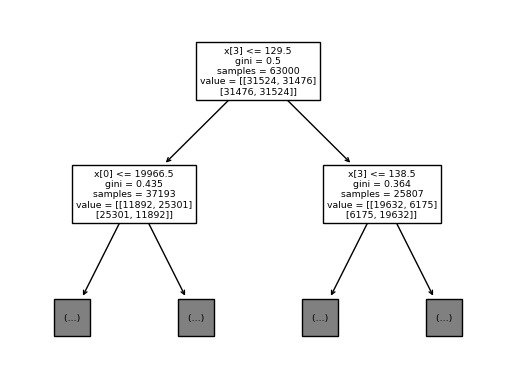

In [138]:
plot_tree(tree, max_depth=1)

In [139]:
df2.keys()

Index(['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bias', 'gender_1.0',
       'gender_2.0', 'cholesterol_1.0', 'cholesterol_2.0', 'cholesterol_3.0',
       'gluc_1.0', 'gluc_2.0', 'gluc_3.0', 'smoke_0.0', 'smoke_1.0',
       'alco_0.0', 'alco_1.0', 'active_0.0', 'active_1.0', 'cardio_0.0',
       'cardio_1.0'],
      dtype='object')